# LENET ARCHITECTURE

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
training_set=train_datagen.flow_from_directory('stage_dataset/train',target_size=(300,300),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('stage_dataset/test',target_size=(300,300),batch_size=32,class_mode='categorical')

Found 1000 images belonging to 3 classes.
Found 942 images belonging to 3 classes.


In [5]:
Classifier=Sequential()
Classifier.add(Convolution2D(256,3,3,input_shape=(300,300,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(3, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [6]:
model_path = 'LENET.h5'
callbacks = [ModelCheckpoint(model_path, monitor='accuracy', save_best_only=True, verbose=1)]

In [7]:
epochs = 80
batch_size = 32

In [9]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,callbacks=callbacks)

Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 1.4737 - accuracy: 0.3667
Epoch 1: accuracy improved from -inf to 0.36674, saving model to LENET.h5
31/31 [==============================] - 466s 15s/step - loss: 1.4737 - accuracy: 0.3667 - val_loss: 1.0288 - val_accuracy: 0.7500
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 1.0712 - accuracy: 0.4411
Epoch 2: accuracy improved from 0.36674 to 0.44112, saving model to LENET.h5
31/31 [==============================] - 421s 14s/step - loss: 1.0712 - accuracy: 0.4411 - val_loss: 1.0960 - val_accuracy: 0.3351
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.5258
Epoch 3: accuracy improved from 0.44112 to 0.52583, saving model to LENET.h5
31/31 [==============================] - 434s 14s/step - loss: 0.9595 - accuracy: 0.5258 - val_loss: 1.3043 - val_accuracy: 0.3739
Epoch 4/10
31/31 [==============================] - ETA: 0s - loss: 0.9070 - accuracy: 0.6167
Epo

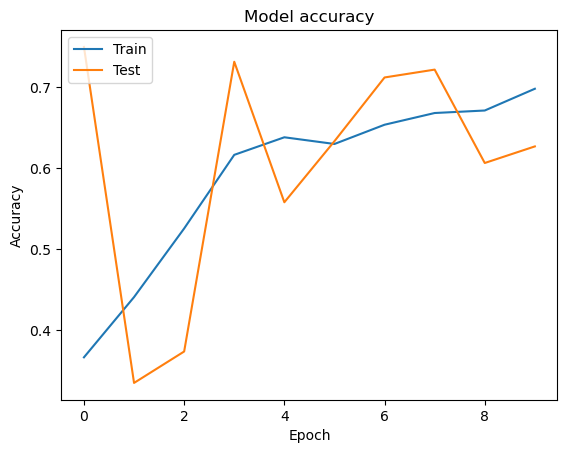

In [10]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(Classifier.history.history['accuracy'])
    plt.plot(Classifier.history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()    
graph()

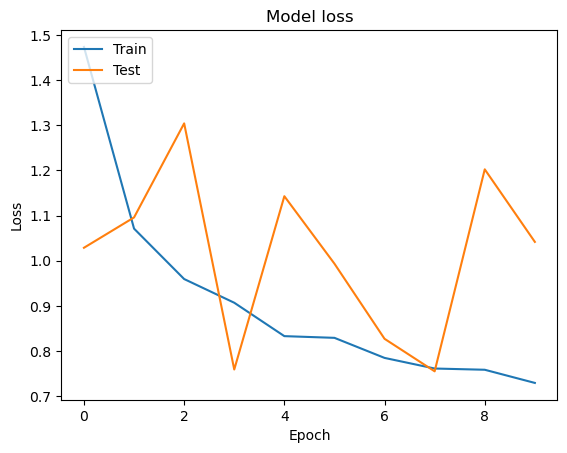

In [11]:
def graph():
    # Plot training & validation loss values
    plt.plot(Classifier.history.history['loss'])
    plt.plot(Classifier.history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()